# Initialization

In [1]:
# Libraries used
import numpy as np
import pandas as pd
import seaborn as sns

# Clean Data
data = pd.read_csv('../data/clean/clean_data.csv')

# Col types adjustement
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

data.dtypes

vendorid                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
ratecodeid                      float64
store_and_fwd_flag               object
pulocationid                      int64
dolocationid                      int64
payment_type                      int64
fare_amount                     float64
mta_tax                         float64
tolls_amount                    float64
improvement_surcharge           float64
congestion_surcharge            float64
airport_fee                     float64
trip_duration                   float64
ttl_am_without_tips             float64
dtype: object

# Categorical Variables

## ```vendorid``` column

As you can se in the chunks below, the mean and the standard deviations of the different vendorid's are quite different.

In [2]:
data['vendorid'].value_counts()

vendorid
2    1376845
1     478008
Name: count, dtype: int64

In [3]:
data.groupby('vendorid')['ttl_am_without_tips'].agg(['mean', 'std'])

,mean,std
vendorid,,
1,20.996548,271.781796
2,24.797822,19.937626


Given that difference, our next steps will be to check for outliers in the data.

There isone extreme outlier in the data, associated with the vendorid code 1, that will be dropped for the sake of data quality.

<Axes: xlabel='ttl_am_without_tips'>

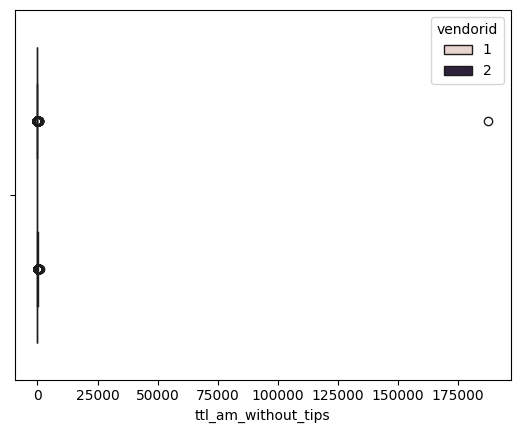

In [4]:
sns.boxplot(data = data, x = 'ttl_am_without_tips', hue = 'vendorid')

In [5]:
data.sort_values('ttl_am_without_tips', ascending = False).head(10)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,trip_duration,ttl_am_without_tips
1234390,1,2023-09-02 15:15:39,2023-09-02 16:12:39,2.0,21.30,2.0,N,239,132,2,187502.96,0.5,6.94,1.0,2.5,0.00,3420.0,187511.40
997818,2,2023-07-13 08:57:00,2023-07-13 13:34:52,4.0,244.33,4.0,N,132,265,2,1040.40,0.0,36.30,1.0,0.0,1.75,16672.0,1079.45
1082432,2,2023-07-30 09:53:49,2023-07-30 12:05:52,1.0,0.04,5.0,N,265,265,2,850.00,0.0,0.00,1.0,0.0,0.00,7923.0,851.00
1028024,1,2023-07-19 10:12:19,2023-07-19 10:14:09,1.0,0.20,5.0,N,70,70,3,800.00,0.0,0.00,1.0,0.0,0.00,110.0,801.00
827069,2,2023-06-07 19:43:03,2023-06-07 21:37:26,1.0,124.79,5.0,N,236,265,2,720.00,0.0,14.75,1.0,0.0,0.00,6863.0,735.75
1030468,2,2023-07-19 16:38:10,2023-07-19 18:58:45,1.0,99.62,4.0,N,132,265,2,680.60,0.5,0.00,1.0,0.0,0.00,8435.0,682.10
1009961,2,2023-07-15 13:12:34,2023-07-15 15:22:35,3.0,98.65,4.0,N,132,265,2,595.20,0.0,21.30,1.0,0.0,1.75,7801.0,619.25
991873,2,2023-07-11 18:29:39,2023-07-12 08:05:22,1.0,24.15,1.0,N,193,193,3,602.90,0.5,0.00,1.0,2.5,0.00,48943.0,606.90
231876,2,2023-02-16 23:15:30,2023-02-17 01:18:10,2.0,91.56,4.0,N,70,265,2,596.60,0.5,6.55,1.0,0.0,1.25,7360.0,605.90
374600,2,2023-03-16 16:34:17,2023-03-16 19:50:26,1.0,168.53,5.0,N,132,265,2,600.00,0.0,0.00,1.0,0.0,1.25,11769.0,602.25


In [6]:
extreme_outlier = data['ttl_am_without_tips'].max()
data = data[data['ttl_am_without_tips'] != extreme_outlier]
data.sort_values('ttl_am_without_tips', ascending = False).head(10)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,trip_duration,ttl_am_without_tips
997818,2,2023-07-13 08:57:00,2023-07-13 13:34:52,4.0,244.33,4.0,N,132,265,2,1040.4,0.0,36.30,1.0,0.0,1.75,16672.0,1079.45
1082432,2,2023-07-30 09:53:49,2023-07-30 12:05:52,1.0,0.04,5.0,N,265,265,2,850.0,0.0,0.00,1.0,0.0,0.00,7923.0,851.00
1028024,1,2023-07-19 10:12:19,2023-07-19 10:14:09,1.0,0.20,5.0,N,70,70,3,800.0,0.0,0.00,1.0,0.0,0.00,110.0,801.00
827069,2,2023-06-07 19:43:03,2023-06-07 21:37:26,1.0,124.79,5.0,N,236,265,2,720.0,0.0,14.75,1.0,0.0,0.00,6863.0,735.75
1030468,2,2023-07-19 16:38:10,2023-07-19 18:58:45,1.0,99.62,4.0,N,132,265,2,680.6,0.5,0.00,1.0,0.0,0.00,8435.0,682.10
1009961,2,2023-07-15 13:12:34,2023-07-15 15:22:35,3.0,98.65,4.0,N,132,265,2,595.2,0.0,21.30,1.0,0.0,1.75,7801.0,619.25
991873,2,2023-07-11 18:29:39,2023-07-12 08:05:22,1.0,24.15,1.0,N,193,193,3,602.9,0.5,0.00,1.0,2.5,0.00,48943.0,606.90
231876,2,2023-02-16 23:15:30,2023-02-17 01:18:10,2.0,91.56,4.0,N,70,265,2,596.6,0.5,6.55,1.0,0.0,1.25,7360.0,605.90
374600,2,2023-03-16 16:34:17,2023-03-16 19:50:26,1.0,168.53,5.0,N,132,265,2,600.0,0.0,0.00,1.0,0.0,1.25,11769.0,602.25
286985,1,2023-02-28 17:54:19,2023-02-28 19:36:34,1.0,94.00,4.0,N,132,265,3,591.7,0.5,6.55,1.0,0.0,1.25,6135.0,599.75


In [7]:
data.groupby('vendorid')['ttl_am_without_tips'].agg(['mean', 'std'])

,mean,std
vendorid,,
1,20.604314,18.032101
2,24.797822,19.937626


<Axes: xlabel='ttl_am_without_tips'>

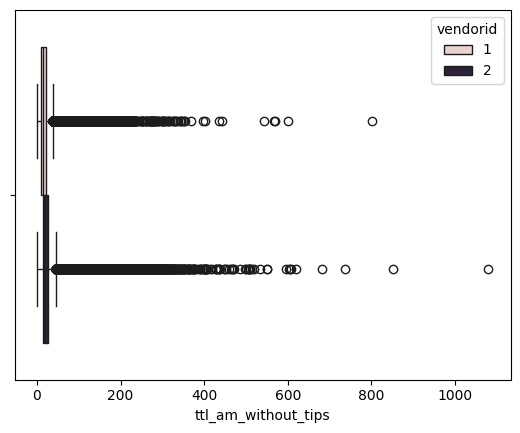

In [8]:
sns.boxplot(data = data, x = 'ttl_am_without_tips', hue = 'vendorid')

## ```ratecodeid``` column

Note that ratecodeid's present different mean values, and, even though the distributions are superposed, the ratecode_id seems to influence the total amount in some way. More variability is found on the codes with less observations.

Also note that it is possible that the ratecodes are related to variables such as trip_distance and trip_duration, further investigation will be done to clarify whether ratecodeid's are good predictors for the total amounts.


In [9]:
data['ratecodeid'].value_counts()

ratecodeid
1.0     1700420
2.0       69433
99.0       9434
3.0        5712
5.0        4121
4.0        3730
Name: count, dtype: int64

In [10]:
data.groupby('ratecodeid')['ttl_am_without_tips'].agg(['mean', 'std'])

,mean,std
ratecodeid,,
1.0,20.574385,13.434860
2.0,79.753656,3.203183
3.0,110.481516,27.518121
4.0,119.696651,73.896456
5.0,99.478595,67.691881
99.0,35.498213,15.888482


<Axes: xlabel='ratecodeid', ylabel='ttl_am_without_tips'>

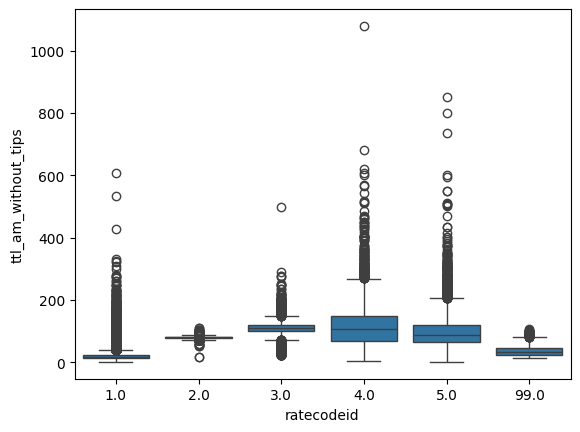

In [11]:
sns.boxplot(data = data, x = 'ratecodeid', y = 'ttl_am_without_tips')

## ```store_and_fwd_flag```column

In this variable, there are no clues of a relationship between the data about the trip influencing the final amount paid by the passengers, this variable unlikely will provide a relevant predictive power to our final models. It sounds reasonable to drop this column from our data.

In [12]:
data['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    1782298
Y      10552
Name: count, dtype: int64

In [13]:
data.groupby('store_and_fwd_flag')['ttl_am_without_tips'].agg(['mean', 'std'])

,mean,std
store_and_fwd_flag,,
N,23.635074,19.633365
Y,20.874380,18.485553


<Axes: xlabel='store_and_fwd_flag', ylabel='ttl_am_without_tips'>

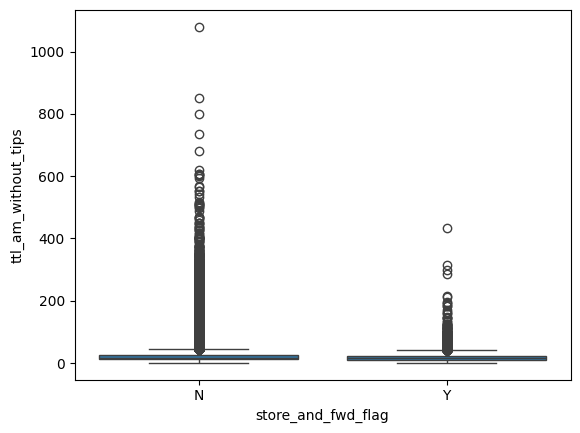

In [14]:
sns.boxplot(data = data, x = 'store_and_fwd_flag', y = 'ttl_am_without_tips')

## ```payment_type```column

The payment type column doesn't show any sign of directly influencing the ttl_am_without_tips value, once the distributions appear overlapped. There is low predictive value for the payment_type column.

In [15]:
data['payment_type'].value_counts()

payment_type
1    1478650
2     307909
0      50188
4      11770
3       6335
Name: count, dtype: int64

In [16]:
data.groupby('payment_type')['ttl_am_without_tips'].agg(['mean', 'std'])

,mean,std
payment_type,,
0,27.242697,16.030891
1,23.594542,19.215990
2,23.740536,21.166467
3,21.527531,26.193718
4,24.650454,24.558236


<Axes: xlabel='payment_type', ylabel='ttl_am_without_tips'>

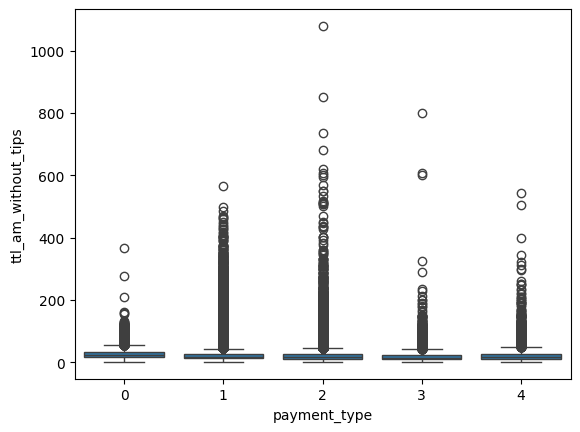

In [17]:
sns.boxplot(data = data, x = 'payment_type', y = 'ttl_am_without_tips')

## ```passenger_count```column

Note that up to six passengers the distributions are quite superposed, while 7, 8, and 9 passengers trips acount for only 7 observations in the whole dataset. 

At the same time, there are several trips where no passengers are reported, and, as this column is a driver entered value, maybe would be safer to disconsider passenger count in a further modelling

In [18]:
data['passenger_count'].value_counts()

passenger_count
1.0    1348128
2.0     271901
3.0      67544
4.0      37536
0.0      28075
5.0      23951
6.0      15708
7.0          3
8.0          3
9.0          1
Name: count, dtype: int64

In [19]:
data.groupby('passenger_count')['ttl_am_without_tips'].agg(['mean', 'std'])

,mean,std
passenger_count,,
0.0,19.113274,16.503845
1.0,22.965168,18.673898
2.0,26.239639,22.427545
3.0,25.781800,22.614000
4.0,27.601687,25.354271
5.0,23.690790,18.822553
6.0,23.448506,17.969295
7.0,83.616667,3.523256
8.0,91.293333,4.392839


<Axes: xlabel='passenger_count', ylabel='ttl_am_without_tips'>

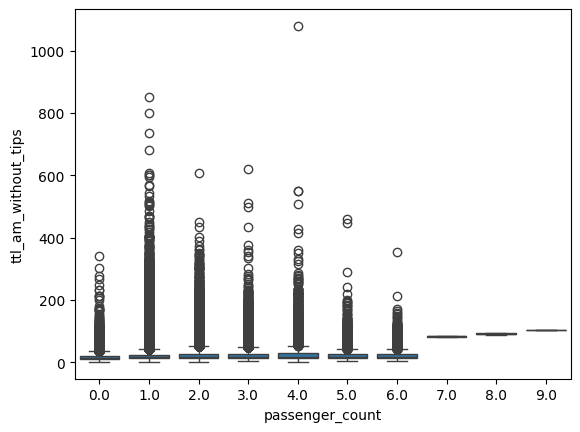

In [20]:
sns.boxplot(data = data, x = 'passenger_count', y = 'ttl_am_without_tips')

In [21]:
data = data.drop(['store_and_fwd_flag', 'passenger_count', 'payment_type'], axis = 1)
data.describe()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,ratecodeid,pulocationid,dolocationid,fare_amount,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,trip_duration,ttl_am_without_tips
count,1.854852e+06,1854852,1854852,1.854852e+06,1.792850e+06,1.854852e+06,1.854852e+06,1.854852e+06,1.854852e+06,1.854852e+06,1.854852e+06,1.792850e+06,1.792850e+06,1.854852e+06,1.854852e+06
mean,1.742294e+00,2023-07-02 04:07:01.199560704,2023-07-02 04:24:39.416512512,4.031947e+00,1.576213e+00,1.653249e+02,1.640272e+02,1.976119e+01,4.969455e-01,6.041076e-01,9.997025e-01,2.325612e+00,1.434639e-01,1.058217e+03,2.371713e+01
min,1.000000e+00,2022-10-25 00:42:10,2022-10-25 00:44:22,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.010000e+00
25%,1.000000e+00,2023-04-02 00:55:18,2023-04-02 01:09:05.750000128,1.100000e+00,1.000000e+00,1.320000e+02,1.140000e+02,9.300000e+00,5.000000e-01,0.000000e+00,1.000000e+00,2.500000e+00,0.000000e+00,4.680000e+02,1.260000e+01
50%,2.000000e+00,2023-06-26 12:20:46.500000,2023-06-26 12:38:20.500000,1.820000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.350000e+01,5.000000e-01,0.000000e+00,1.000000e+00,2.500000e+00,0.000000e+00,7.660000e+02,1.710000e+01
75%,2.000000e+00,2023-10-06 01:29:18.750000128,2023-10-06 01:46:39,3.500000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.190000e+01,5.000000e-01,0.000000e+00,1.000000e+00,2.500000e+00,0.000000e+00,1.248000e+03,2.550000e+01
max,2.000000e+00,2024-01-01 00:01:34,2024-01-01 11:27:52,1.030786e+05,9.900000e+01,2.650000e+02,2.650000e+02,1.040400e+03,4.000000e+00,9.663000e+01,1.000000e+00,2.500000e+00,1.750000e+00,2.445440e+05,1.079450e+03
std,4.373715e-01,NaN,NaN,1.469271e+02,7.093050e+00,6.383196e+01,6.980324e+01,1.792756e+01,3.923573e-02,2.185434e+00,1.466789e-02,6.368345e-01,4.656568e-01,2.472840e+03,1.955063e+01


In [22]:
data.to_csv('../data/processed/processed_01.csv', index=False)